In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_c14_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        47.2673 (40.9456, 53.9544) (40.8175, 53.8018) 12.9843 (Jnode 202)\n',
 't_n104        41.2209 (33.9749, 48.8131) (33.8739, 48.6986) 14.8247 (Jnode 201)\n',
 't_n105        39.9844 (32.9282, 47.3937) (32.8483, 47.3014) 14.4532 (Jnode 200)\n',
 't_n106        36.0225 (29.5899, 42.8185) (29.4666, 42.6697) 13.2031 (Jnode 199)\n',
 't_n107        35.0621 (28.7886, 41.6869) (28.6360, 41.5220) 12.8860 (Jnode 198)\n',
 't_n108        33.2698 (27.2821, 39.6157) (27.1870, 39.5008) 12.3139 (Jnode 197)\n',
 't_n109        18.2958 (14.5238, 22.3289) (14.3881, 22.1851)  7.7971 (Jnode 196)\n',
 't_n110        18.1586 (14.4113, 22.1619) (14.3441, 22.0917)  7.7476 (Jnode 195)\n',
 't_n111        17.7013 (14.0375, 21.6183) (13.9565, 21.5279)  7.5714 (Jnode 194)\n',
 't_n112        17.1512 (13.5891, 20.9639) (13.5294, 20.8892)  7.3597 (Jnode 193)\n',
 't_n113        16.4381 (13.0137, 20.1098) (12.9638, 20.0521)  7.0883 (Jnode 192)\n',
 't_n114        12.4480 ( 9.6378, 15.5590) ( 9.5516, 1

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[47.2673,
 41.2209,
 39.9844,
 36.0225,
 35.0621,
 33.2698,
 18.2958,
 18.1586,
 17.7013,
 17.1512,
 16.4381,
 12.448,
 9.1541,
 7.0673,
 3.5273,
 12.6714,
 10.9247,
 17.0044,
 11.2913,
 16.3569,
 13.1442,
 10.6898,
 9.2405,
 15.8439,
 14.9676,
 3.8733,
 17.4907,
 15.9419,
 12.3824,
 9.9194,
 11.4785,
 10.5166,
 8.9162,
 8.7401,
 31.1679,
 24.9197,
 33.4766,
 30.5801,
 28.4144,
 23.2592,
 12.1054,
 22.2829,
 19.4861,
 17.2889,
 14.7347,
 27.7731,
 25.5611,
 6.2285,
 2.7296,
 37.63,
 35.4504,
 32.0498,
 30.9612,
 33.2447,
 21.8688,
 27.2153,
 21.4536,
 40.0203,
 37.586,
 34.1049,
 32.2224,
 27.2236,
 17.9453,
 24.0744,
 33.674,
 11.0569,
 33.9588,
 22.0458,
 21.4189,
 20.9358,
 19.8527,
 18.253,
 17.4237,
 16.8032,
 16.0573,
 14.2836,
 12.3536,
 10.2874,
 14.5216,
 13.6845,
 10.8556,
 12.3449,
 15.7914,
 14.6306,
 13.6016,
 11.8124,
 8.5592,
 14.919,
 13.4229,
 11.8845,
 17.3742,
 16.5072,
 15.6665,
 13.8821,
 10.2016,
 15.5515,
 10.0982,
 8.2671,
 3.1068,
 21.3199,
 18.3036]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_c14_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[47.3627,
 40.8893,
 38.758,
 34.7598,
 33.4112,
 30.5391,
 17.1345,
 16.9064,
 16.0737,
 15.2352,
 14.3994,
 10.6863,
 7.7511,
 5.7073,
 3.271,
 11.1556,
 9.1843,
 15.1892,
 9.8955,
 14.3771,
 11.3442,
 9.0158,
 8.3418,
 14.1064,
 13.0205,
 4.1531,
 15.9357,
 14.1525,
 10.9444,
 8.659,
 10.2028,
 9.0417,
 7.4066,
 8.1564,
 28.1753,
 23.1442,
 31.3409,
 28.1222,
 25.3486,
 20.5468,
 11.3488,
 20.249,
 17.0528,
 14.6443,
 12.0199,
 25.5057,
 23.0338,
 7.4603,
 3.4281,
 34.898,
 31.748,
 27.5078,
 26.9665,
 30.0411,
 20.0281,
 24.5477,
 18.6041,
 39.4014,
 36.5372,
 32.4914,
 29.8053,
 25.2169,
 17.7509,
 21.6337,
 31.7666,
 12.0424,
 32.3629,
 24.4233,
 23.0041,
 21.7645,
 20.2672,
 18.2934,
 17.1799,
 16.2056,
 14.984,
 12.9382,
 10.8895,
 8.9811,
 13.2569,
 12.2368,
 9.5824,
 10.4527,
 14.9568,
 13.4823,
 12.1091,
 10.3265,
 7.4216,
 13.604,
 12.0421,
 10.3167,
 16.8332,
 15.478,
 14.0784,
 12.0567,
 8.4688,
 14.5405,
 10.4829,
 8.1273,
 3.251,
 23.4012,
 19.8423]

In [12]:
posterior_mean_iqtree

[47.2673,
 41.2209,
 39.9844,
 36.0225,
 35.0621,
 33.2698,
 18.2958,
 18.1586,
 17.7013,
 17.1512,
 16.4381,
 12.448,
 9.1541,
 7.0673,
 3.5273,
 12.6714,
 10.9247,
 17.0044,
 11.2913,
 16.3569,
 13.1442,
 10.6898,
 9.2405,
 15.8439,
 14.9676,
 3.8733,
 17.4907,
 15.9419,
 12.3824,
 9.9194,
 11.4785,
 10.5166,
 8.9162,
 8.7401,
 31.1679,
 24.9197,
 33.4766,
 30.5801,
 28.4144,
 23.2592,
 12.1054,
 22.2829,
 19.4861,
 17.2889,
 14.7347,
 27.7731,
 25.5611,
 6.2285,
 2.7296,
 37.63,
 35.4504,
 32.0498,
 30.9612,
 33.2447,
 21.8688,
 27.2153,
 21.4536,
 40.0203,
 37.586,
 34.1049,
 32.2224,
 27.2236,
 17.9453,
 24.0744,
 33.674,
 11.0569,
 33.9588,
 22.0458,
 21.4189,
 20.9358,
 19.8527,
 18.253,
 17.4237,
 16.8032,
 16.0573,
 14.2836,
 12.3536,
 10.2874,
 14.5216,
 13.6845,
 10.8556,
 12.3449,
 15.7914,
 14.6306,
 13.6016,
 11.8124,
 8.5592,
 14.919,
 13.4229,
 11.8845,
 17.3742,
 16.5072,
 15.6665,
 13.8821,
 10.2016,
 15.5515,
 10.0982,
 8.2671,
 3.1068,
 21.3199,
 18.3036]

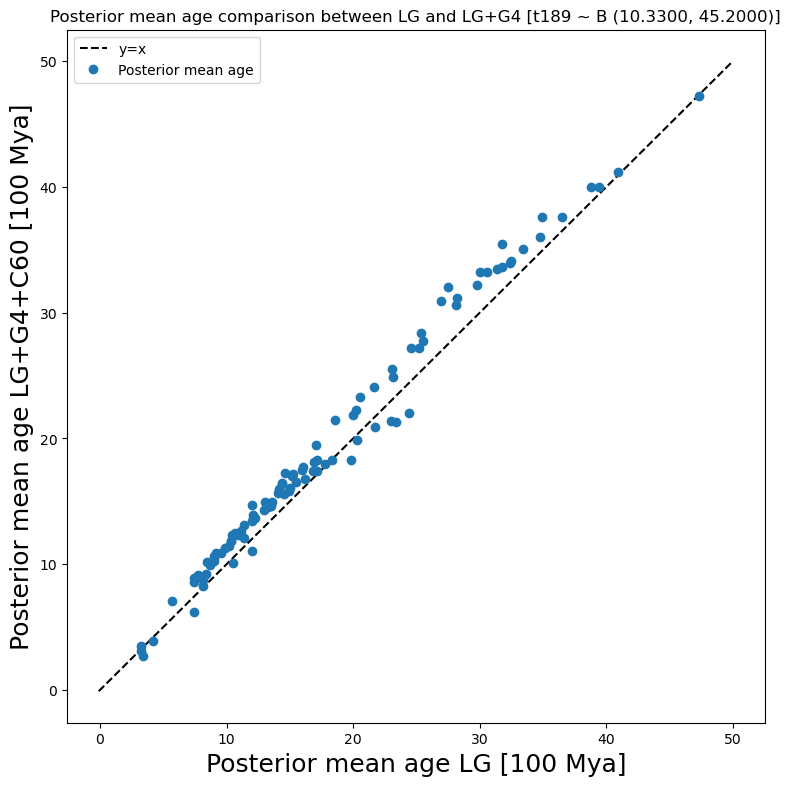

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t189 ~ B (10.3300, 45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_c14_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')